# Part 1 Analysis

Nate Silver discusses the difficulty of predicting earthquakes in **The Signal and the Noise**. Nevertheless, we will try to identify some patterns by analyzing the deadly earthquakes that have occurred since 1900.

To start, read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using the `requests` and/or `beautifulsoup` library and load it to a pandas dataframe. You will need to do some data cleaning before you can proceed.

Data cleaning tasks include:

* Replace empty strings with NaN
* Remove the footnotes from the 'Other Source Deaths' column
* Convert Magnitude to a numeric type. For this portion, you can ignore differences in seismic magnitude scales.
* Correct number of deaths when there is more than one value. When there is more than one value given, choose the largest.
* Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
* Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

Also, add any supplemental data you'd like in order to explore ideas related to earthquake occurrence and effects, but understand that it is not required.

Answer the following questions:

1. Are there factors that make an earthquake more likely?
2. Are there factors that make an earthquake more deadly?

In [62]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time

In [59]:
# Set defaults
sns.set()

## Reading the pre-cleaned data

In [2]:
world_earthquakes = pd.read_csv("../data/world_earthquakes_06_clean.csv")

### Checking the head and the tail

In [3]:
display(world_earthquakes.head())
display(world_earthquakes.tail())

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths
0,1900-05-11 17:23:00,1900,5,11,17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0
1,1900-07-12 06:25:00,1900,7,12,06:25:00,Turkey,40.3,43.1,NaN,5.9,NaN,140
2,1900-10-29 09:11:00,1900,10,29,09:11:00,Venezuela,11.0,-66.0,0.0,7.7,NaN,0
3,1901-02-15 00:00:00,1901,2,15,00:00:00,China,26.0,100.1,0.0,6.5,NaN,0
4,1901-03-31 07:11:00,1901,3,31,07:11:00,Bulgaria,43.4,28.7,NaN,6.4,NaN,4


,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths
1335,2011-03-24 20:25:00,2011,3,24,20:25:00,Burma,NaN,NaN,NaN,6.8,NaN,150
1336,2011-04-07 14:32:00,2011,4,7,14:32:00,Japan,38.200,140.000,66.0,7.1,NaN,0
1337,2011-09-18 12:40:00,2011,9,18,12:40:00,India,27.723,88.064,19.7,6.9,landslide,111
1338,2011-09-23 10:41:00,2011,9,23,10:41:00,Turkey,38.600,43.500,7.2,7.1,NaN,601
1339,2018-08-05 19:46:00,2018,8,5,19:46:00,Indonesia,NaN,NaN,31.0,6.9,NaN,0


## Quick statistics and info

In [4]:
world_earthquakes.shape

(1340, 12)

In [5]:
world_earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1340 non-null   object 
 1   year               1340 non-null   int64  
 2   month              1340 non-null   int64  
 3   day                1340 non-null   int64  
 4   time               1340 non-null   object 
 5   country            1340 non-null   object 
 6   latitude           1325 non-null   float64
 7   longitude          1325 non-null   float64
 8   depth              1250 non-null   float64
 9   magnitude          1339 non-null   float64
 10  secondary_effects  373 non-null    object 
 11  deaths             1340 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 125.8+ KB


## Additional Cleanups

### Convert `date` to a `datetime` type

In [9]:
world_earthquakes["date"] = world_earthquakes["date"].astype("datetime64")
world_earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1340 non-null   datetime64[ns]
 1   year               1340 non-null   int64         
 2   month              1340 non-null   int64         
 3   day                1340 non-null   int64         
 4   time               1340 non-null   object        
 5   country            1340 non-null   object        
 6   latitude           1325 non-null   float64       
 7   longitude          1325 non-null   float64       
 8   depth              1250 non-null   float64       
 9   magnitude          1339 non-null   float64       
 10  secondary_effects  373 non-null    object        
 11  deaths             1340 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 125.8+ KB


### Dropping `year`, `month`, `day`, `time`

Since we have converted date to a `datetime` format, we can easily access all the datetime parts from that

In [16]:
world_earthquakes = world_earthquakes.drop("year", axis=1)
world_earthquakes = world_earthquakes.drop("month", axis=1)
world_earthquakes = world_earthquakes.drop("day", axis=1)
world_earthquakes = world_earthquakes.drop("time", axis=1)
world_earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1340 non-null   datetime64[ns]
 1   country            1340 non-null   object        
 2   latitude           1325 non-null   float64       
 3   longitude          1325 non-null   float64       
 4   depth              1250 non-null   float64       
 5   magnitude          1339 non-null   float64       
 6   secondary_effects  373 non-null    object        
 7   deaths             1340 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 83.9+ KB


## Data Exploration

### Locations of the earthquakes

First, let's look at the general locations, i.e the countries

#### How many unique countries are in this dataset?

In [23]:
len(world_earthquakes["country"].unique())

108

In [30]:
world_earthquakes.shape

(1340, 8)

**Sidenotes/Remarks**
- There are 108 unique countries in this dataset.
- There are 1340 entries in this dataset.

#### What is the frequency of each country in the dataset?

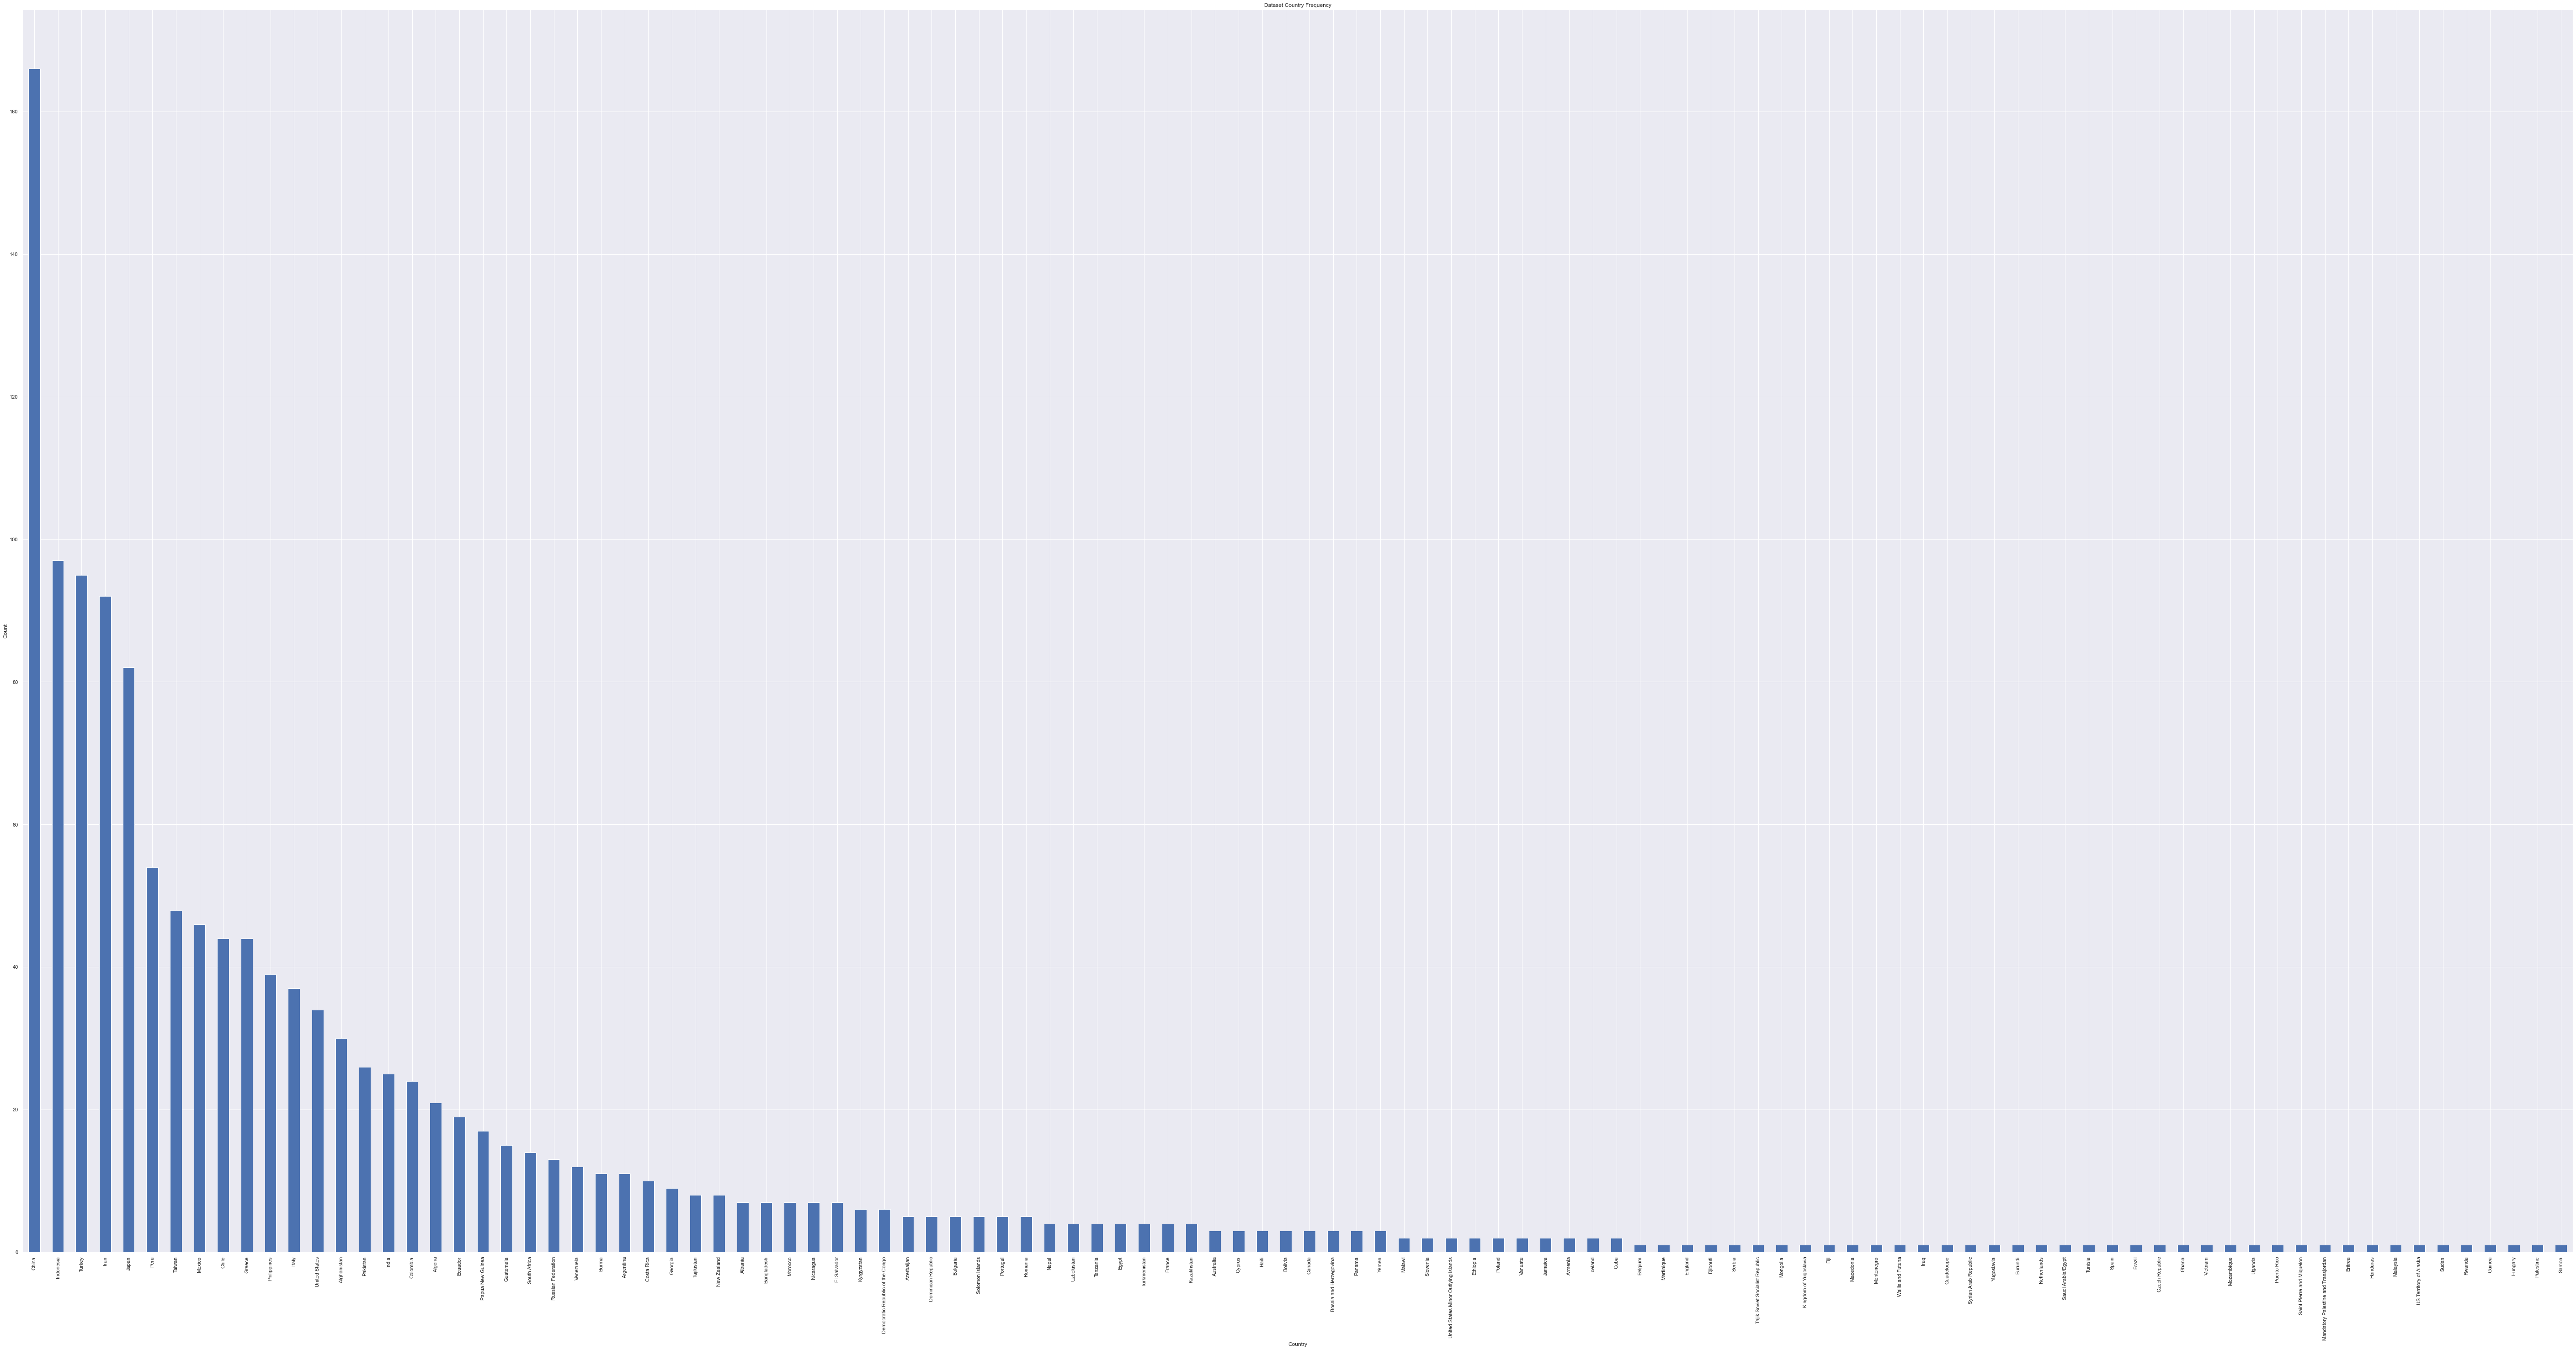

In [63]:
world_earthquakes["country"].value_counts().plot(kind="bar", figsize=(100,50))
plt.title("Dataset Country Frequency")
plt.xlabel("Country")
plt.ylabel("Count");

**Sidenotes/Remarks:**
- It looks the distribution is quite skewed: Some countries have more earthquakes than the others.

#### Who are the top 25 countries?

Let's look at the top 25 countries.

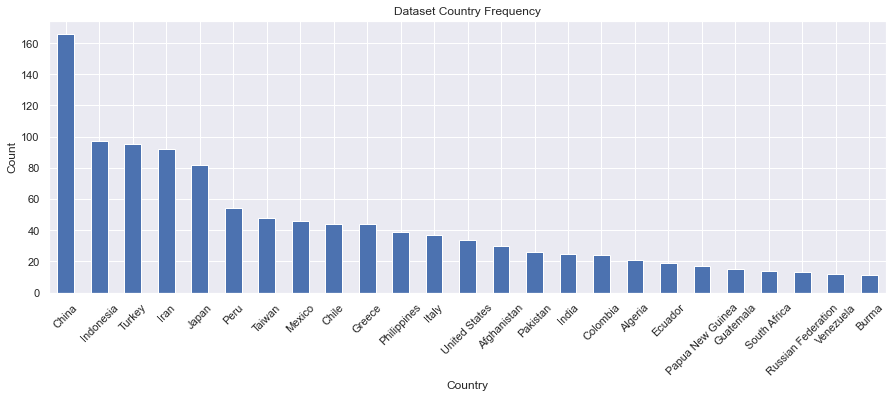

In [64]:
world_earthquakes["country"].value_counts()[:25].plot(kind="bar", rot=45, figsize=(15,5))
plt.title("Dataset Country Frequency")
plt.xlabel("Country")
plt.ylabel("Count");

In [84]:
world_earthquakes["country"].value_counts()[:25]

China                 166
Indonesia              97
Turkey                 95
Iran                   92
Japan                  82
Peru                   54
Taiwan                 48
Mexico                 46
Chile                  44
Greece                 44
Philippines            39
Italy                  37
United States          34
Afghanistan            30
Pakistan               26
India                  25
Colombia               24
Algeria                21
Ecuador                19
Papua New Guinea       17
Guatemala              15
South Africa           14
Russian Federation     13
Venezuela              12
Burma                  11
Name: country, dtype: int64

**Sidenotes/Remarks:**
- China is the top country where the most earthquakes are reported from.
- The top 5 countries are all on the Asia continent.
  - *Maybe we should look more into the distribution on the continent level?*
- Japan is ranked 5th.
- USA is ranked 13th.

#### Who are the bottom 25 countries?

Let's look at the bottom 25 countries.

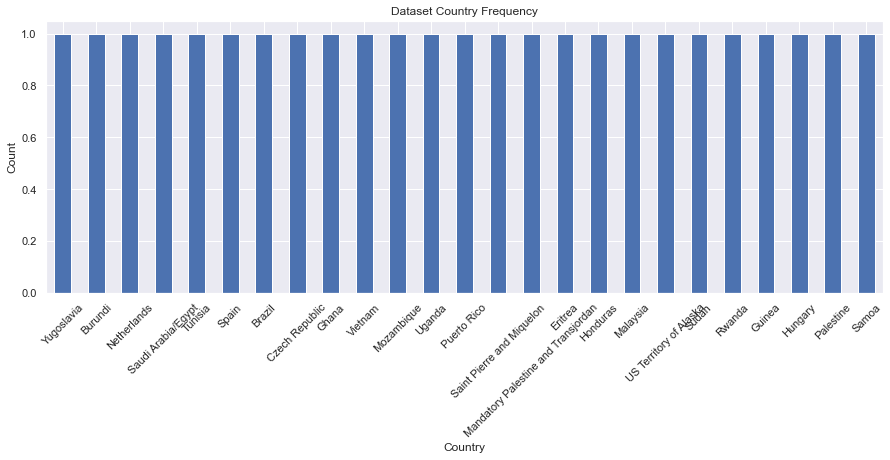

In [67]:
world_earthquakes["country"].value_counts()[-25:].plot(kind="bar", rot=45, figsize=(15,5))
plt.title("Dataset Country Frequency")
plt.xlabel("Country")
plt.ylabel("Count");

**Sidenotes/Remarks:**
- These countries only reported a single incident from this dataset.
- This could be used to confirm how infrequent earthquakes are in these countries
- We could be more specific and check all countries who only reported a single incident from this dataset
- **So the range of the country frequency is from 1 to 166 (China)**

#### How many countries only reported a single incident in this dataset?

In [78]:
single_freq_countries = world_earthquakes["country"].value_counts()[world_earthquakes["country"].value_counts().to_frame()["country"] == 1]
single_freq_countries.count()

40

#### Who are these countries?

In [83]:
single_freq_countries.sort_index()

Belgium                                1
Brazil                                 1
Burundi                                1
Czech Republic                         1
Djibouti                               1
England                                1
Eritrea                                1
Fiji                                   1
Ghana                                  1
Guadeloupe                             1
Guinea                                 1
Honduras                               1
Hungary                                1
Iraq                                   1
Kingdom of Yugoslavia                  1
Macedonia                              1
Malaysia                               1
Mandatory Palestine and Transjordan    1
Martinique                             1
Mongolia                               1
Montenegro                             1
Mozambique                             1
Netherlands                            1
Palestine                              1
Puerto Rico     

#### Who are the middle countries?

These have noticed that the top 24 countries reported between 166 (China) and 12 (Venezuela). And the bottom 40 reported only a single instance of earthquake. Let's look at the middle that doe not meet those criteria and see their distribution.

In [86]:
mid_freq_countries = world_earthquakes["country"].value_counts()[
    (world_earthquakes["country"].value_counts().to_frame()["country"] < 12) &
    (world_earthquakes["country"].value_counts().to_frame()["country"] > 1)
]
mid_freq_countries.count()

44

In [87]:
mid_freq_countries

Burma                                   11
Argentina                               11
Costa Rica                              10
Georgia                                  9
Tajikistan                               8
New Zealand                              8
Albania                                  7
Bangladesh                               7
Morocco                                  7
Nicaragua                                7
El Salvador                              7
Kyrgyzstan                               6
Democratic Republic of the Congo         6
Azerbaijan                               5
Dominican Republic                       5
Bulgaria                                 5
Solomon Islands                          5
Portugal                                 5
Romania                                  5
Nepal                                    4
Uzbekistan                               4
Tanzania                                 4
Egypt                                    4
Turkmenista

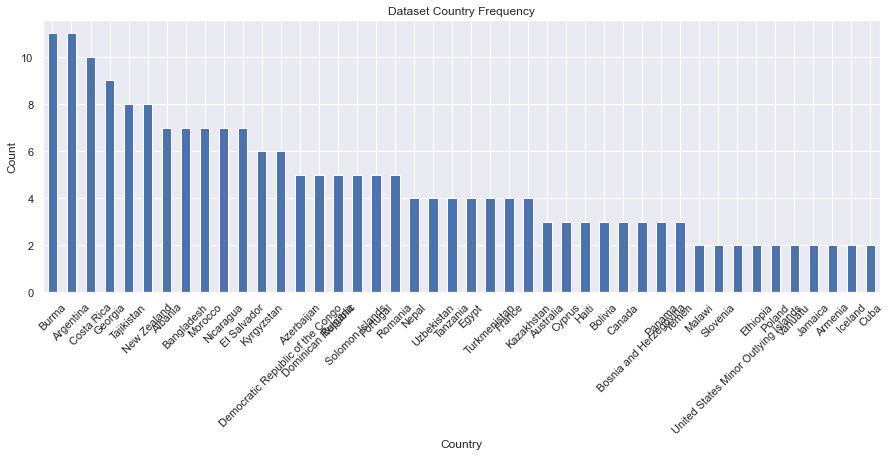

In [88]:
mid_freq_countries.plot(kind="bar", rot=45, figsize=(15,5))
plt.title("Dataset Country Frequency")
plt.xlabel("Country")
plt.ylabel("Count");